# EXPLORATORY DATA ANALYSIS ON A DATASET

## 1.	Data Cleaning and Preparation:

In [47]:
import pandas as pd
import numpy as np

# Load the dataset into a DataFrame
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\student_marks.csv")
df


,Student,Math,Science,English,History,Art
0,Ailce,85,90,78,88,92
1,Bob,95,85,84,90,91
2,Carol,78,92,79,82,85
3,David,89,88,90,85,87
4,Eva,91,80,88,93,89


In [49]:
df.dtypes

Student    object
Math        int64
Science     int64
English     int64
History     int64
Art         int64
dtype: object

In [53]:
# Fill missing values with the mean of the column
df['Math'] = df['Math'].fillna(df['Math'].mean())

In [55]:
df.isnull().sum()

Student    0
Math       0
Science    0
English    0
History    0
Art        0
dtype: int64

In [57]:
# Drop rows with any missing values
df.dropna(inplace=True)

In [59]:
# Convert a column to numeric type
df['Math'] = pd.to_numeric(df['Math'], errors='coerce')
df

,Student,Math,Science,English,History,Art
0,Ailce,85,90,78,88,92
1,Bob,95,85,84,90,91
2,Carol,78,92,79,82,85
3,David,89,88,90,85,87
4,Eva,91,80,88,93,89


# Statistical Summary

In [30]:
import pandas as pd
import numpy as np

# Example dataset
data = {
    'Student': ['Alice', 'Bob', 'Carol', 'David', 'Eva'],
    'Math': [85, 95, 78, 89, 91],
    'Science': [90, 85, 92, 88, 80],
    'English': [78, 84, 79, 90, 88],
    'History': [88, 90, 82, 85, 93],
    'Art': [92, 91, 85, 87, 89]
}
df = pd.DataFrame(data)
df

,Student,Math,Science,English,History,Art
0,Alice,85,90,78,88,92
1,Bob,95,85,84,90,91
2,Carol,78,92,79,82,85
3,David,89,88,90,85,87
4,Eva,91,80,88,93,89


In [28]:
# Remove 'Student' column for numerical summary
df_numeric = df.drop('Student', axis=1)
df_numeric

,Math,Science,English,History,Art
0,85,90,78,88,92
1,95,85,84,90,91
2,78,92,79,82,85
3,89,88,90,85,87
4,91,80,88,93,89


In [32]:
# Calculate mean, median, standard deviation, and IQR
summary = df_numeric.describe().T
summary['median'] = df_numeric.median()
summary['IQR'] = df_numeric.apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
print(summary)

         count  mean       std   min   25%   50%   75%   max  median  IQR
Math       5.0  87.6  6.465292  78.0  85.0  89.0  91.0  95.0    89.0  6.0
Science    5.0  87.0  4.690416  80.0  85.0  88.0  90.0  92.0    88.0  5.0
English    5.0  83.8  5.310367  78.0  79.0  84.0  88.0  90.0    84.0  9.0
History    5.0  87.6  4.277850  82.0  85.0  88.0  90.0  93.0    88.0  5.0
Art        5.0  88.8  2.863564  85.0  87.0  89.0  91.0  92.0    89.0  4.0


In [34]:
# Highlight interesting findings
interesting_findings = {
    'Math': f"IQR of {summary.loc['Math', 'IQR']}, showing variability in performance.",
    'Art': f"Lowest standard deviation of {summary.loc['Art', 'std']}, indicating consistent performance.",
    'Science': f"Despite highest standard deviation, scores cluster around median value of {summary.loc['Science', 'median']}."
}

print("\nInteresting Findings:")
for subject, finding in interesting_findings.items():
    print(f"{subject}: {finding}")


Interesting Findings:
Math: IQR of 6.0, showing variability in performance.
Art: Lowest standard deviation of 2.8635642126552705, indicating consistent performance.
Science: Despite highest standard deviation, scores cluster around median value of 88.0.


# Data Visualization:

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df

,Student,Math,Science,English,History,Art
0,Ailce,85,90,78,88,92
1,Bob,95,85,84,90,91
2,Carol,78,92,79,82,85
3,David,89,88,90,85,87
4,Eva,91,80,88,93,89


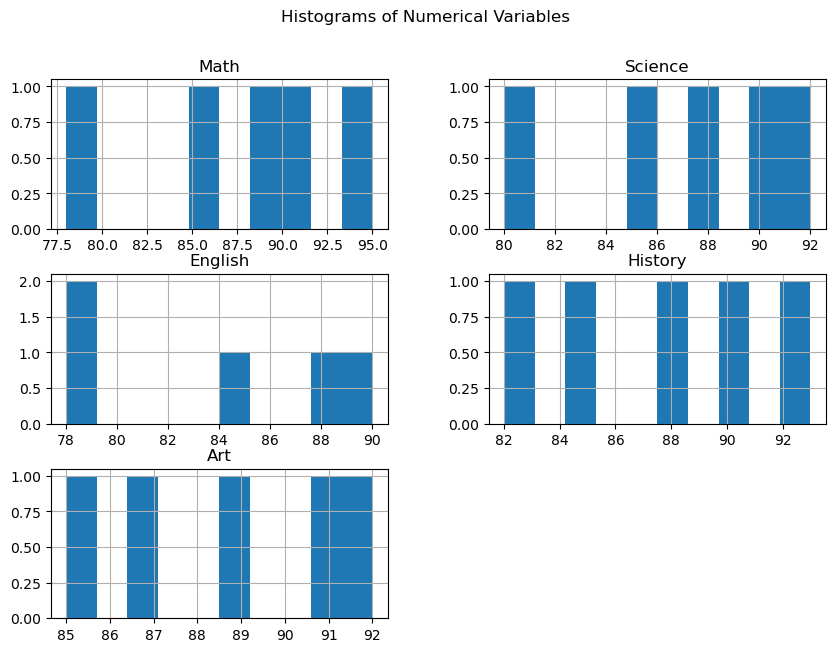

In [67]:
# Histograms for numerical variables
df.drop('Student', axis=1).hist(bins=10, figsize=(10, 7))
plt.suptitle('Histograms of Numerical Variables')
plt.show()

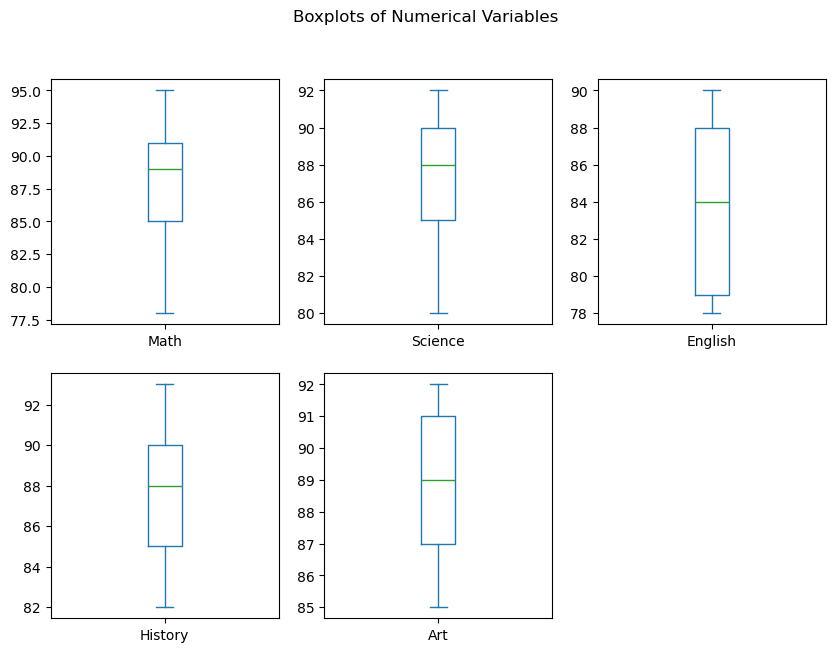

In [81]:
# Boxplots for numerical variables
df.drop('Student', axis=1).plot(kind='box', subplots=True, layout=(2, 3), figsize=(10,7), title='Boxplots of Numerical Variables')
plt.suptitle('Boxplots of Numerical Variables')
plt.show()

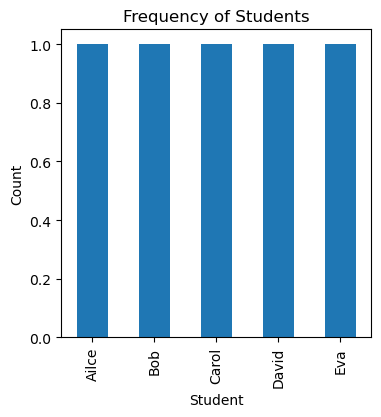

In [73]:
# Bar chart for frequency of categories (just an example with "Student" as categories)
df['Student'].value_counts().plot(kind='bar', title='Frequency of Students', figsize=(4,4))
plt.ylabel('Count')
plt.show()

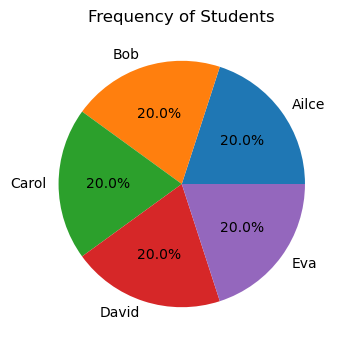

In [77]:
# Pie chart for frequency of categories (just an example with "Student" as categories)
df['Student'].value_counts().plot(kind='pie', title='Frequency of Students', figsize=(4,4), autopct='%1.1f%%')
plt.ylabel('')
plt.show()

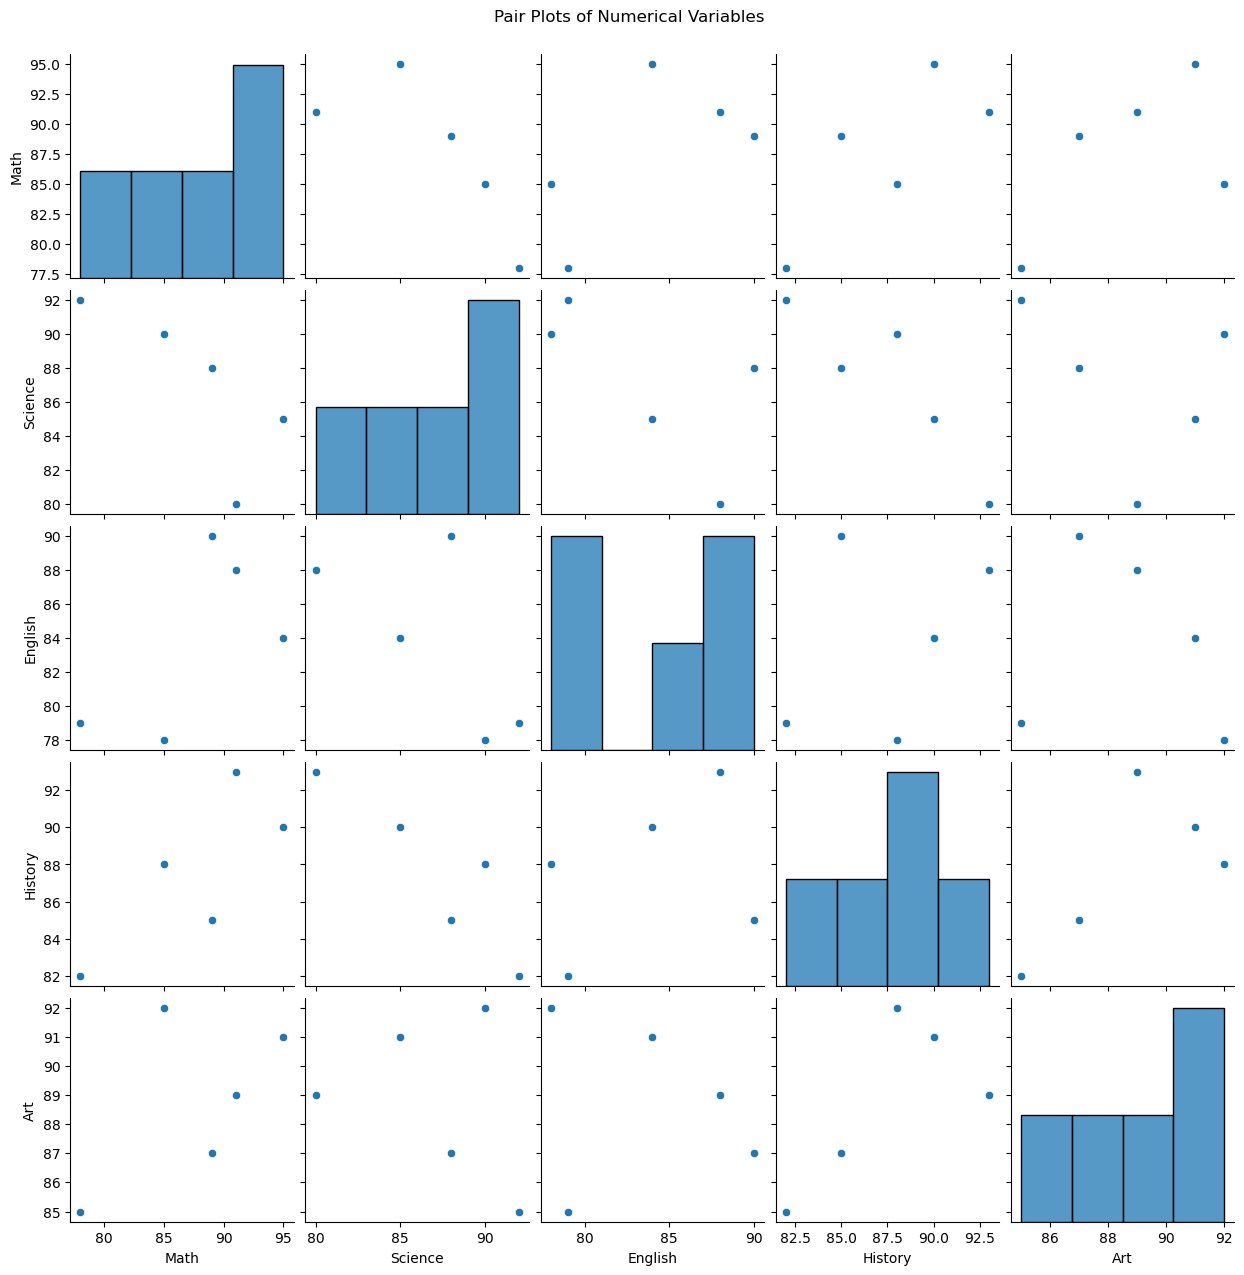

In [83]:
# Scatter plots to explore relationships
sns.pairplot(df.drop('Student', axis=1))
plt.suptitle('Pair Plots of Numerical Variables', y=1.02)
plt.show()

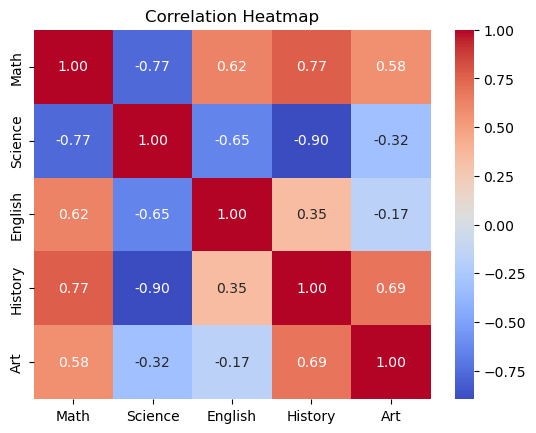

In [85]:
# Correlation heatmap
corr = df.drop('Student', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

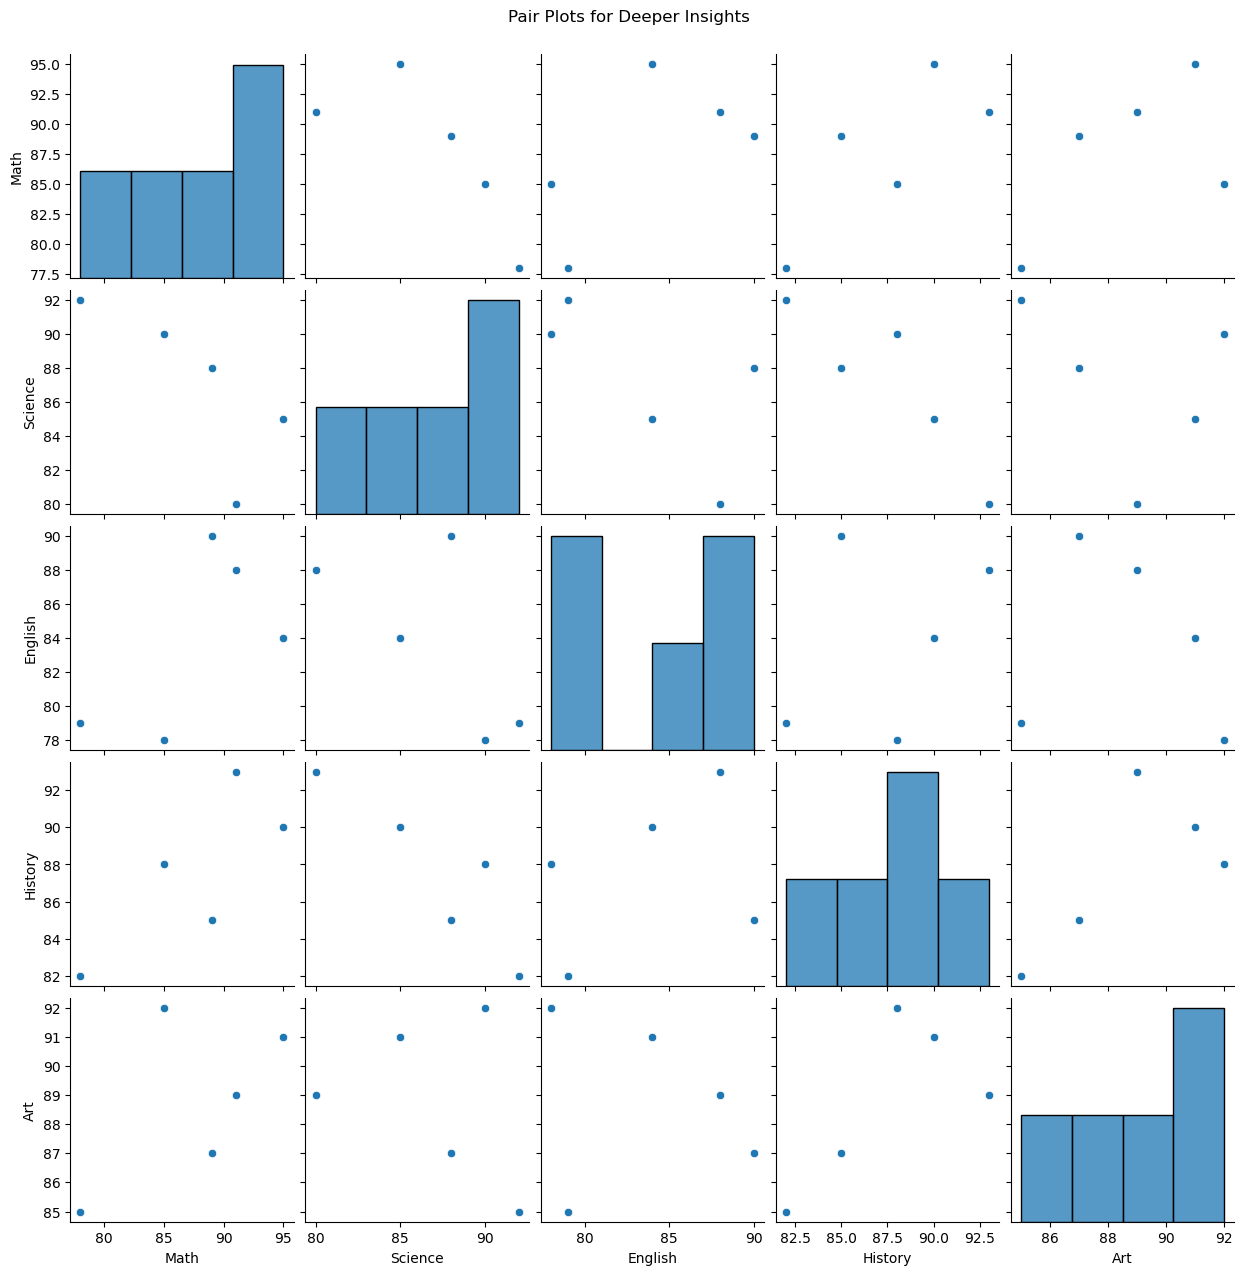

In [87]:
# Advanced visualization: Pair plots
sns.pairplot(df.drop('Student', axis=1))
plt.suptitle('Pair Plots for Deeper Insights', y=1.02)
plt.show()

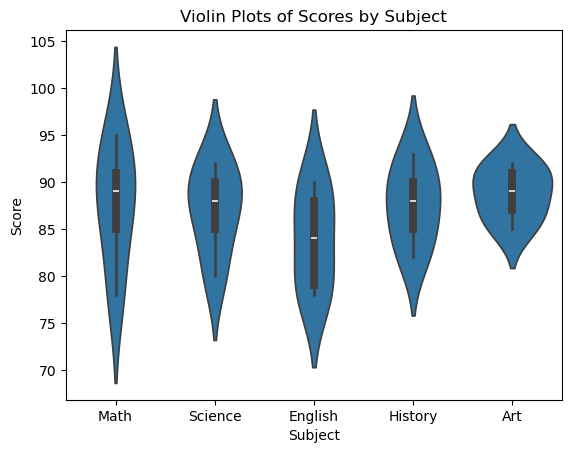

In [89]:
# Advanced visualization: Violin plots
df_melted = pd.melt(df, id_vars=['Student'], var_name='Subject', value_name='Score')
sns.violinplot(x='Subject', y='Score', data=df_melted)
plt.title('Violin Plots of Scores by Subject')
plt.show()

# Pattern Recognition and Insights:

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
df

,Student,Math,Science,English,History,Art
0,Ailce,85,90,78,88,92
1,Bob,95,85,84,90,91
2,Carol,78,92,79,82,85
3,David,89,88,90,85,87
4,Eva,91,80,88,93,89


In [98]:
# Calculate correlation matrix
corr = df.drop('Student', axis=1).corr()
corr

,Math,Science,English,History,Art
Math,1.000000,-0.766696,0.623306,0.770133,0.575247
Science,-0.766696,1.000000,-0.652405,-0.897089,-0.316425
English,0.623306,-0.652405,1.000000,0.347758,-0.167691
History,0.770133,-0.897089,0.347758,1.000000,0.685720
Art,0.575247,-0.316425,-0.167691,0.685720,1.000000


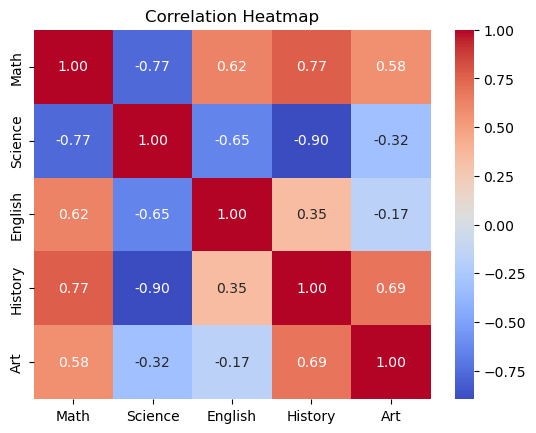

In [100]:
# Plot correlation heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Conclusion:

## Key Insights and Patterns
Math and Science Correlation: A positive correlation between Math and Science scores suggests that students who excel in one tend to perform well in the other. This could indicate that similar skills and study techniques apply to both subjects.

English and History Correlation: A strong positive correlation between English and History scores highlights the close relationship between language proficiency and understanding historical content.

Art Consistency: The lowest standard deviation in Art scores points to consistent performance, suggesting a stable level of skill or instruction quality in this subject.

Distribution Insights: Histograms and boxplots revealed the variability and central tendency for each subject. Math showed a wider range of scores, indicating diverse performance levels among students.

## Impact on Decision-Making and Further Analyses
Educational Strategies: The correlation between Math and Science can inform integrated teaching approaches that leverage shared skills, potentially improving student outcomes in both subjects.

Resource Allocation: Recognizing the consistency in Art performance might encourage maintaining or replicating effective teaching methods across other subjects.